# **The Spark Foundation #GRIPAug21**

**TASK3:Exploratory Data Analysis - Retail ML**

**AUTHOR: Niharika Goel**

**As a business manager, try to find out the weak areas where you can 
work to make more profit.


**What all business problems you can derive by exploring the data?**

Dataset- https://bit.ly/3i4rbWl

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
data= pd.read_csv("samplesuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **Understanding of the data**

In [3]:
data.shape

(9994, 13)

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.duplicated().sum()

17

In [6]:
data = data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.Country.unique()

array(['United States'], dtype=object)

In [8]:
data = data.drop(columns=["Country","Postal Code"], axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


# Data Expolration

**1. Correlation between variables**

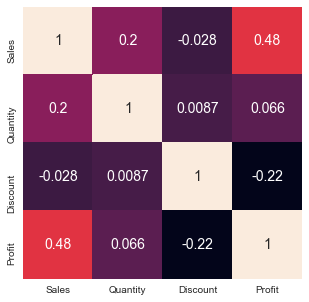

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

**2. Profit Analysis**

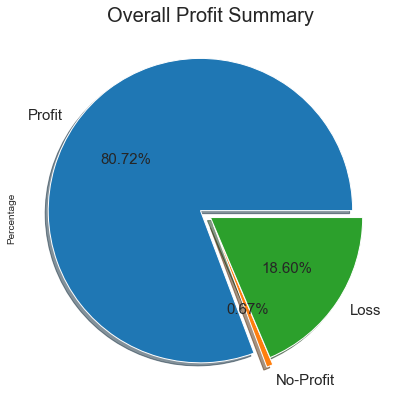

In [11]:
summary = pd.DataFrame({'Profit':data.Quantity[data.Profit > 0].sum(), 
                        'No-Profit':data.Quantity[data.Profit == 0].sum(), 
                        'Loss':data.Quantity[(data.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Profit Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.05,0))
plt.show()

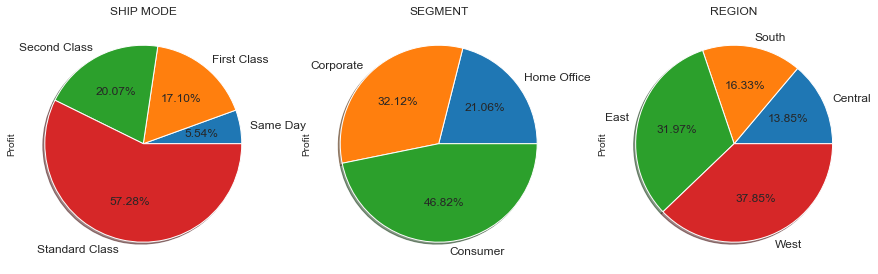

In [12]:
# Plotting Shipmode, Segment, and Region-wise profit
prof_S = pd.DataFrame(data.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(data.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(data.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=True, ax=ax[2])
plt.show()

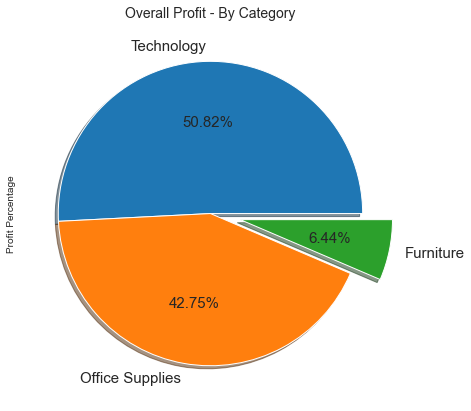

In [13]:
cat = np.round(data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall Profit - By Category', fontsize=14)
cat.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.2), shadow=True)
plt.show()

Category-wise Summary


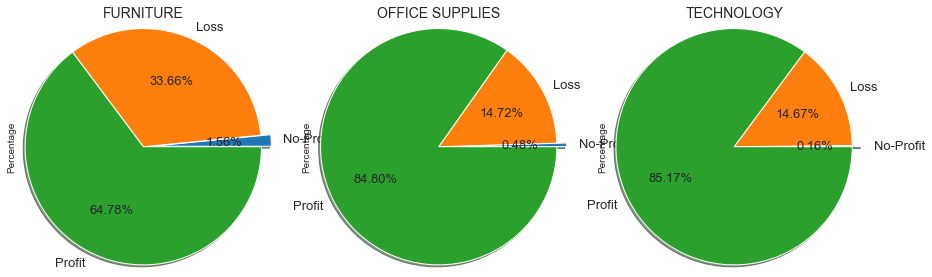

In [14]:
summ_offc = pd.DataFrame({'Profit':data[(data.Category == 'Office Supplies') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Office Supplies') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Office Supplies')
                                    & (data.Profit < 0)].count()[0]},
                         index={'Percentage'}).T.sort_values('Percentage')
summ_furn = pd.DataFrame({'Profit':data[(data.Category == 'Furniture') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Furniture') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Furniture') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_tech = pd.DataFrame({'Profit':data[(data.Category == 'Technology') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Category == 'Technology') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Category == 'Technology') 
                                    & (data.Profit < 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,3, figsize=(15,5))
print('Category-wise Summary')
ax[0].set_title('FURNITURE', fontsize=14)
ax[1].set_title('OFFICE SUPPLIES', fontsize=14)
ax[2].set_title('TECHNOLOGY', fontsize=14)
summ_furn.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[0])
summ_offc.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[1])
summ_tech.Percentage.plot.pie(autopct='%1.2f%%', radius= 1.2, explode=(0.1, 0, 0), 
                              textprops = {"fontsize":13}, shadow=True, ax=ax[2])
plt.show()

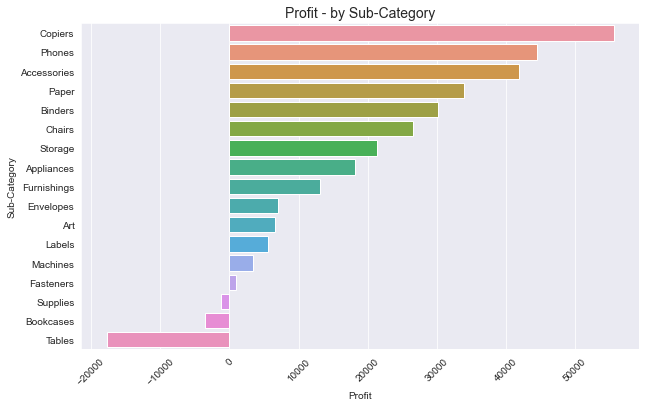

In [15]:
sub = np.round(data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.figure(figsize=(10,6))
plt.title('Profit - by Sub-Category', fontsize=14)
sns.barplot(sub.Profit, sub.index)
plt.xticks(rotation=45)
plt.show()

**3. Overall Quantity Analysis**

Total items Sold: 37820


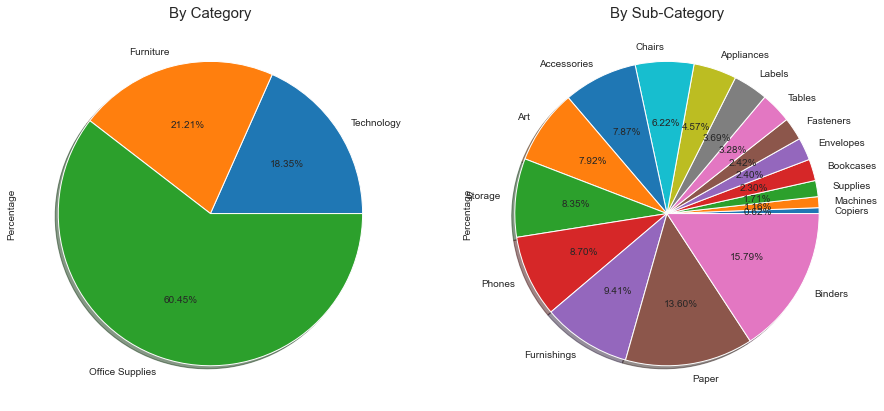

In [16]:
cat = data.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub = data.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')
print(f'Total items Sold: {data.Quantity.sum()}')
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)
cat.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[0])
sub.Count.plot.pie(autopct='%1.2f%%', label='Percentage', radius=1, shadow=True, ax=ax[1])
plt.show()

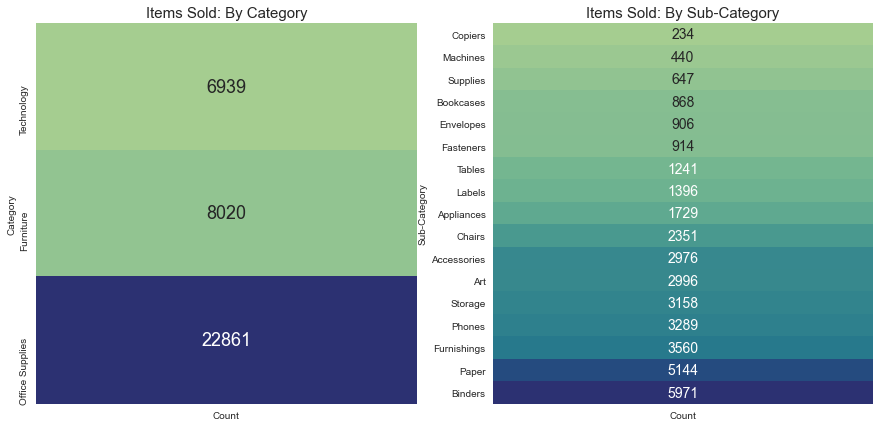

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title('Items Sold: By Category', fontsize=15)
ax[1].set_title('Items Sold: By Sub-Category', fontsize=15)
sns.heatmap(cat, ax=ax[0], cbar=False, annot=True, cmap='crest', fmt='2', annot_kws={'size':18})
sns.heatmap(sub, ax=ax[1], annot=True, cbar=False, cmap='crest', fmt='2', annot_kws={'size':14})
plt.show()
plt.show()

**4. State-wise Analysis**

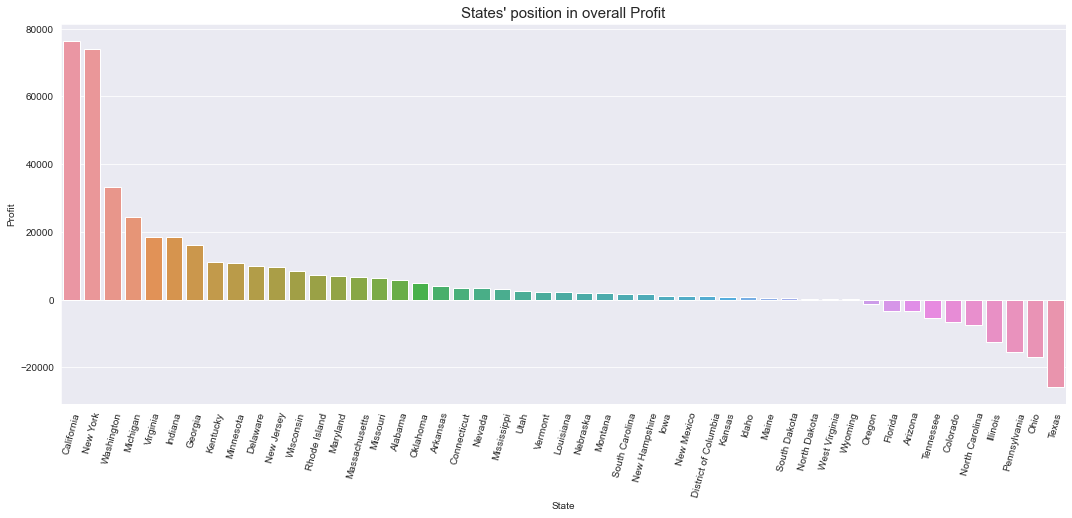

In [18]:
state_P = pd.DataFrame(data.groupby('State').sum()).sort_values('Profit', ascending=False)
plt.figure(figsize=(18,7))
plt.title("States' position in overall Profit", fontsize=15)
sns.barplot(state_P.index, state_P.Profit)
plt.xticks(rotation=75)
plt.show()

**5. Region-wise Analysis**

REGION-WISE PROFIT SUMMARY


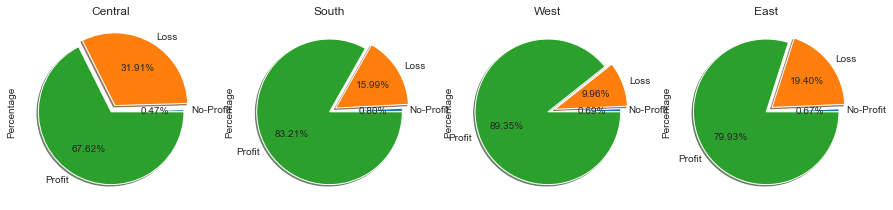

In [19]:
summ_cent = pd.DataFrame({'Profit':data[(data.Region == 'Central') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'Central') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'Central') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_sou = pd.DataFrame({'Profit':data[(data.Region == 'South') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'South') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'South') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_west = pd.DataFrame({'Profit':data[(data.Region == 'West') 
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'West') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'West') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
summ_east = pd.DataFrame({'Profit':data[(data.Region == 'East')
                                        & (data.Profit > 0)].count()[0], 
                        'No-Profit':data[(data.Region == 'East') 
                                         & (data.Profit == 0)].count()[0], 
                        'Loss':data[(data.Region == 'East') 
                                    & (-data.Profit > 0)].count()[0]},
                       index={'Percentage'}).T.sort_values('Percentage')
fig, ax = plt.subplots(1,4, figsize=(15,5))
print('REGION-WISE PROFIT SUMMARY')
ax[0].set_title('Central')
ax[1].set_title('South')
ax[2].set_title('West')
ax[3].set_title('East')
summ_cent.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[0], explode=(0,0.1,0), shadow=True)
summ_sou.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[1], explode=(0,0.1,0), shadow=True)
summ_west.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[2], explode=(0,0.1,0), shadow=True)
summ_east.Percentage.plot.pie(autopct='%1.2f%%', ax=ax[3], explode=(0,0.1,0), shadow=True)
plt.show()

**6. Quantity,Discount and Profit Analysis**

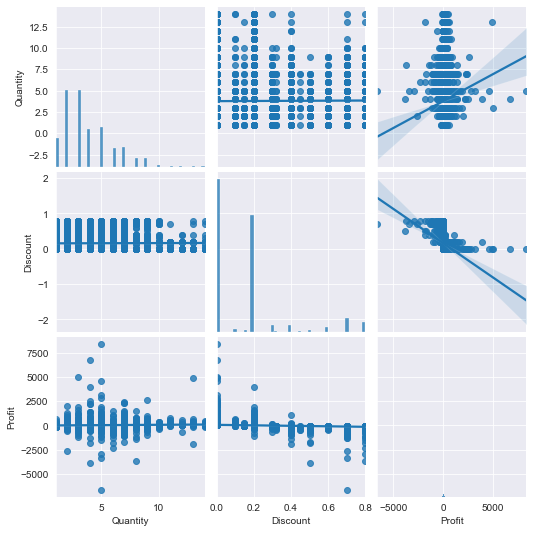

In [20]:
# Pairplot showing dependency of variables
sns.pairplot(data=data.iloc[:,-3:], kind='reg')
plt.show()

In [ ]:
# Analysis on Discount, Quantity & Profit
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)
sns.lineplot(data.Discount, data.Profit, color='green', label='Profit Change', ax=ax[0])
sns.lineplot(data.Quantity, data.Profit, color='red', label='Profit Change', ax=ax[1])
plt.show()

In [ ]:
# Plotting Profit change with Discount 
plt.figure(figsize=(10,7))
sns.scatterplot(data.Discount, data.Profit, hue=data.Profit, s=100)
plt.show()

**7. Sales analysis**

In [ ]:
state_S = pd.DataFrame(data.groupby('State').sum()).sort_values('Sales', ascending=False)
plt.figure(figsize=(18,7))
plt.title("States by Sales", fontsize=15)
sns.barplot(state_P.index, state_P.Sales)
plt.xticks(rotation=75)
plt.show()

In [ ]:
sub_S = pd.DataFrame(data.groupby('Sub-Category').sum()).sort_values('Sales', ascending=False)
plt.figure(figsize=(18,7))
plt.title("Sub-Category by Sales", fontsize=15)
sns.barplot(sub_S.index, sub_S.Sales)
plt.xticks(rotation=75)
plt.show()

In [ ]:
x=data.groupby('Region')['Sales'].sum()
x.head()

In [ ]:
x.plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',labels=x.index)

In [ ]:
y=data.groupby('Segment')['Sales'].sum()
y.head()

In [ ]:
y.plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',labels=y.index)

In [ ]:
z=data.groupby('Ship Mode')['Sales'].sum()
z.head()

In [ ]:
z.plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',labels=z.index)

In [ ]:
x1=data.groupby('Category')['Sales'].sum()
x1.head()

In [ ]:
x1.plot.pie(subplots=True,figsize=(10,10),autopct='%1.1f%%',labels=x1.index)